# Load packages

In [1]:
import pymc3 as pm
import numpy as np
import math as m
import matplotlib.pyplot as plt
import dive 
import deerlab as dl
import warnings
from scipy.io import loadmat
import arviz as az

def preprocess(file_name):
    t, V = dl.deerload(file_name)
    V = dl.correctphase(V)
    t = dl.correctzerotime(V, t)
    
    return V, t

# Preprocess data

### Sample 1

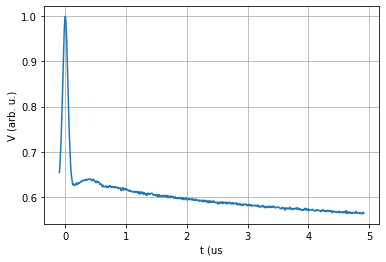

In [2]:
[V1_, t1_] = preprocess('/Users/sarahsweger/SynologyDrive/SynologyDrive/Bayesian/Nonparametric/Paper/ringtest_labB/sample1_labB.DSC')

# Cut off first point
t1=t1_[3:]
V1=V1_[3:]

# Cut off 2+1 artifact
cut = 0.8
V1 = V1[t1<=max(t1)-cut]
t1 = t1[t1<=max(t1)-cut]

# Normalize
V1 = V1/np.max(V1)

# Plot
plt.plot(t1,V1)
plt.xlabel('t (us')
plt.ylabel('V (arb. u.)')
plt.grid()

### Sample 2

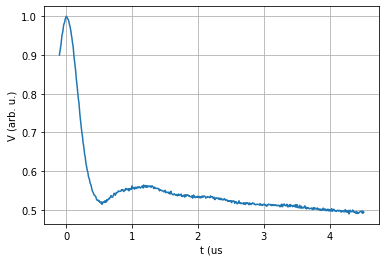

In [3]:
[V2_, t2_] = preprocess('/Users/sarahsweger/SynologyDrive/SynologyDrive/Bayesian/Nonparametric/Paper/ringtest_labB/sample2_labB.DSC')

# Cut off first point, shift zero time 
t2=t2_[1:]
V2=V2_[1:]
t2 = t2-(0.12-0.008)

# Cut off 2+1 artifact
cut = 1.2
V2 = V2[t2<=max(t2)-cut]
t2 = t2[t2<=max(t2)-cut]

# Normalize
V2 = V2/np.max(V2)

# Plot
plt.plot(t2,V2)
plt.xlabel('t (us')
plt.ylabel('V (arb. u.)')
plt.grid()

### Sample 3

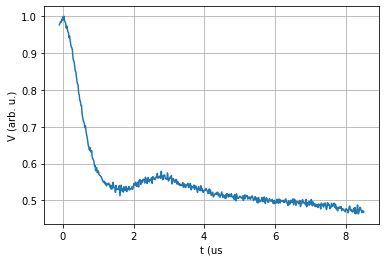

In [4]:
[V3_, t3_] = preprocess('/Users/sarahsweger/SynologyDrive/SynologyDrive/Bayesian/Nonparametric/Paper/ringtest_labB/sample3_labB.DSC')

# Cut off first point, shift zero time 
t3=t3_[1:]
V3=V3_[1:]
t3 = t3-(0.12-0.008)

# Cut off 2+1 artifact
cut = 1.2
V3 = V3[t3<=max(t3)-cut]
t3 = t3[t3<=max(t3)-cut]

# Normalize
V3 = V3/np.max(V3)

# Plot
plt.plot(t3,V3)
plt.xlabel('t (us')
plt.ylabel('V (arb. u.)')
plt.grid()

### Sample 4

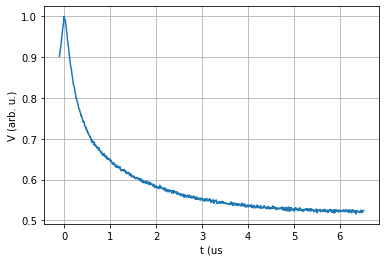

In [5]:
[V4_, t4_] = preprocess('/Users/sarahsweger/SynologyDrive/SynologyDrive/Bayesian/Nonparametric/Paper/ringtest_labB/sample4_labB.DSC')

# Cut off first point, shift zero time 
t4=t4_[1:]
V4=V4_[1:]
t4 = t4-(0.12-0.008)

# Cut off 2+1 artifact
cut = 1.2
V4 = V4[t4<=max(t4)-cut]
t4 = t4[t4<=max(t4)-cut]

# Normalize
V4 = V4/np.max(V4)

# Plot
plt.plot(t4,V4)
plt.xlabel('t (us')
plt.ylabel('V (arb. u.)')
plt.grid()

# Sample 1 analysis

### nGauss = 1

In [30]:
pars = {"method": 'gaussian', "r": np.linspace(1.0,6.0,120),"bkgd_var":"k","nGauss":1}

s1_1Gmodel_rmaxauto_dr005 = dive.model(t1, V1, pars)

MCMCparameters = {"draws": 50000,"tune": 20000, "chains": 4, 'cores': 4}
trace_s1_1G_rmaxauto_dr005_k_4c_50s_20t = dive.sample(s1_1Gmodel_rmaxauto_dr005,MCMCparameters)

Time range:          627 points (dt=0.00798724) from -0.0968 µs to 4.9112 µs
Distance range:      132 points (dr=0.0503606) from 1.5 nm to 8.14759 nm
Model:              gaussian
Number of Gaussian: 1


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [lamb, V0, k, sigma, w, r0_rel]


/Users/sarahsweger/opt/anaconda3/envs/Python38/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/sarahsweger/opt/anaconda3/envs/Python38/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/sarahsweger/opt/anaconda3/envs/Python38/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/sarahsweger/opt/anaconda3/envs/Python38/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 5_000 tune and 50_000 draw iterations (20_000 + 200_000 draws total) took 3663 seconds.


In [31]:
pm.save_trace(trace_s1_1G_rmaxauto_dr005_k_4c_50s_5t, 'trace_s1_1G_rmaxauto_dr005_k_4c_50s_5t.trace')

dive.summary(trace_s1_1G_rmaxauto_dr005_k_4c_50s_5t,s1_1Gmodel_rmaxauto_dr005)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
"$r_{0,1}$",2.378,0.008,2.362,2.394,0.0,0.0,69730.0,97530.0,1.0
$w_1$,0.995,0.029,0.942,1.050,0.0,0.0,74708.0,102296.0,1.0
$k$,0.027,0.000,0.027,0.028,0.0,0.0,133012.0,122969.0,1.0
$λ$,0.375,0.002,0.371,0.380,0.0,0.0,58088.0,81430.0,1.0
$V_0$,1.016,0.004,1.009,1.023,0.0,0.0,57651.0,80733.0,1.0
$σ$,0.006,0.000,0.006,0.007,0.0,0.0,135849.0,121081.0,1.0


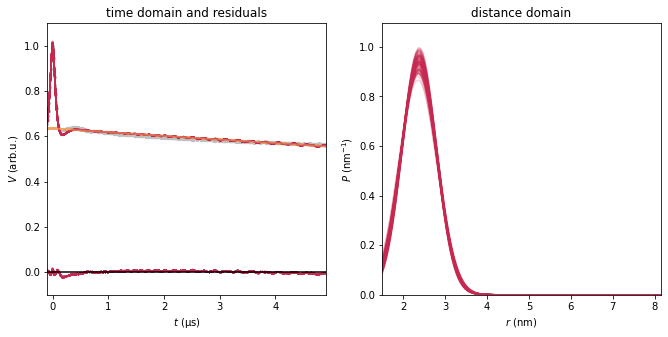

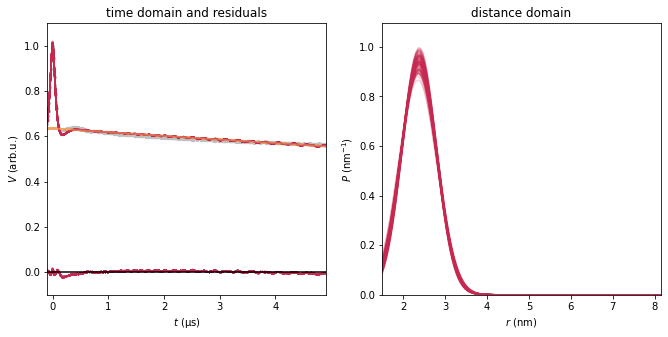

In [32]:
dive.plotresult(trace_s1_1G_rmaxauto_dr005_k_4c_50s_5t,s1_1Gmodel_rmaxauto_dr005)

### nGauss = 2

In [10]:
pars = {"method": 'gaussian', "r": np.linspace(1.0,6.0,100),"nGauss":2}

s1_2Gmodel_rmax75_dr005 = dive.model(t1, V1, pars)

MCMCparameters = {"draws": 5000,"tune": 2000, "chains": 4, 'cores': 4}
trace_s1_2G_rmax75_dr005_k_4c_50s_5t = dive.sample(s1_2Gmodel_rmax75_dr005,MCMCparameters)

Time range:          627 points (dt=0.00798724) from -0.0968 µs to 4.9112 µs
Distance range:      100 points (dr=0.05) from 1 nm to 6 nm
Model:              gaussian
Number of Gaussian: 2


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [lamb, V0, Bend, sigma, a, w, r0_rel]


/Users/sarahsweger/opt/anaconda3/envs/Python38/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/sarahsweger/opt/anaconda3/envs/Python38/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/sarahsweger/opt/anaconda3/envs/Python38/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 2_000 tune and 5_000 draw iterations (8_000 + 20_000 draws total) took 1022 seconds.
There were 203 divergences after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
"$r_{0,1}$",2.370,0.004,2.362,2.377,0.000,0.000,775.0,255.0,1.01
"$r_{0,2}$",5.922,0.037,5.859,5.988,0.001,0.000,4142.0,5576.0,1.00
$w_1$,0.887,0.014,0.863,0.914,0.001,0.001,561.0,186.0,1.01
$w_2$,0.310,0.287,0.075,0.485,0.037,0.027,415.0,135.0,1.01
$a_1$,0.934,0.014,0.913,0.953,0.001,0.001,418.0,133.0,1.01
$a_2$,0.066,0.014,0.047,0.087,0.001,0.001,418.0,133.0,1.01
$k$,0.024,0.000,0.023,0.024,0.000,0.000,11790.0,11816.0,1.00
$B_\mathrm{end}$,0.890,0.001,0.888,0.891,0.000,0.000,11790.0,11816.0,1.00
$λ$,0.382,0.003,0.377,0.388,0.000,0.000,496.0,165.0,1.01
$V_0$,1.016,0.005,1.007,1.025,0.000,0.000,480.0,156.0,1.01


/Users/sarahsweger/opt/anaconda3/envs/Python38/lib/python3.9/site-packages/arviz/plots/backends/matplotlib/pairplot.py:232: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of resulting pair plots with these variables, generating only a 8x8 grid
  warnings.warn(


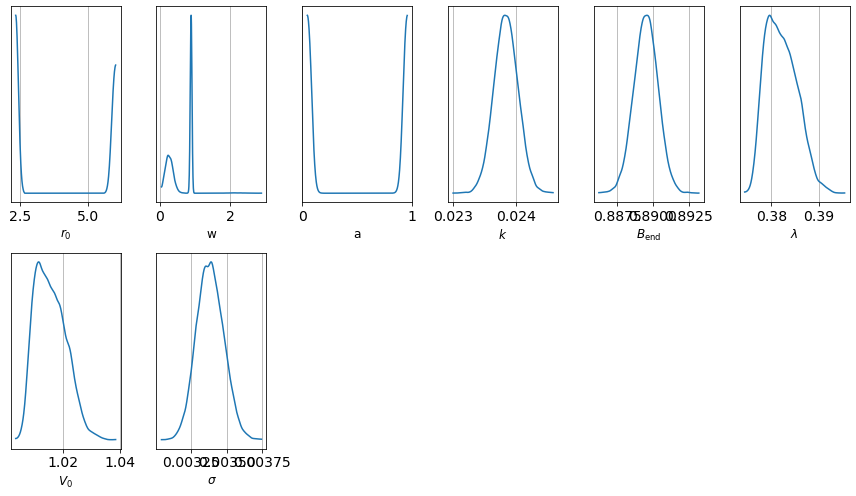

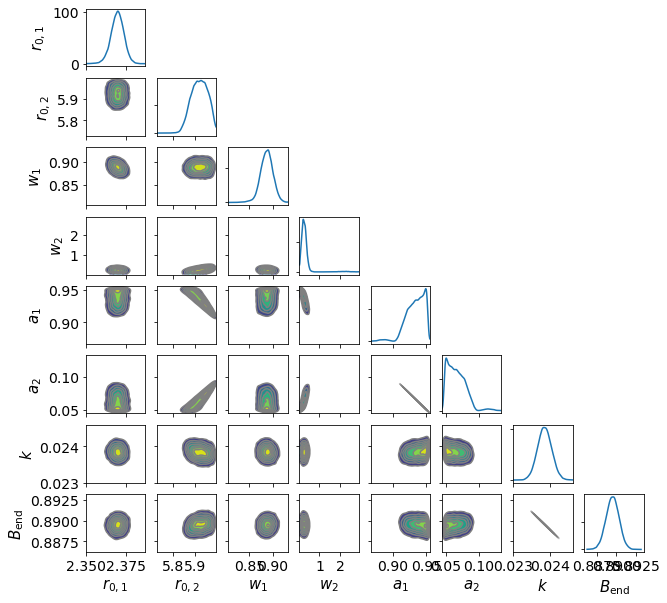

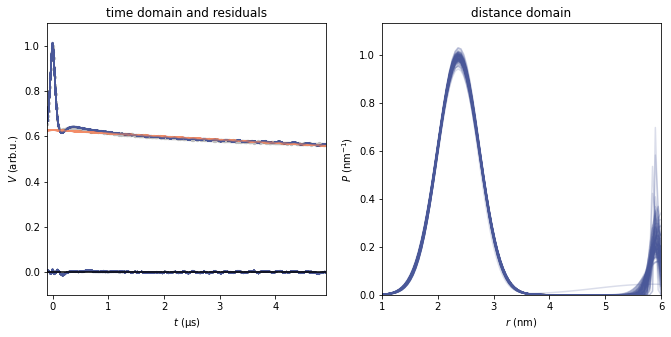

In [11]:
# Save trace
pm.save_trace(trace_s1_2G_rmax75_dr005_k_4c_50s_5t, 'trace_s1_2G_rmax6_dr005_k_4c_5s_2t.trace',overwrite=True)

# Print results
dive.summary(trace_s1_2G_rmax75_dr005_k_4c_50s_5t,s1_2Gmodel_rmax75_dr005)

### nGauss = 3

In [12]:
pars = {"method": 'gaussian', "r": np.linspace(1,6,100),"nGauss":3}

s1_3Gmodel_rmax6_dr005 = dive.model(t1, V1, pars)

MCMCparameters = {"draws": 5000,"tune": 2000, "chains": 4, 'cores': 4}
trace_s1_3G_rmax6_dr005_k_4c_5s_2t = dive.sample(s1_3Gmodel_rmax6_dr005,MCMCparameters)

Time range:          627 points (dt=0.00798724) from -0.0968 µs to 4.9112 µs
Distance range:      100 points (dr=0.05) from 1 nm to 6 nm
Model:              gaussian
Number of Gaussian: 3


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [lamb, V0, Bend, sigma, a, w, r0_rel]


/Users/sarahsweger/opt/anaconda3/envs/Python38/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/sarahsweger/opt/anaconda3/envs/Python38/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/sarahsweger/opt/anaconda3/envs/Python38/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 2_000 tune and 5_000 draw iterations (8_000 + 20_000 draws total) took 964 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
"$r_{0,1}$",2.322,0.038,2.242,2.353,0.018,0.013,7.0,31.0,1.53
"$r_{0,2}$",3.266,0.597,2.225,3.879,0.288,0.219,7.0,29.0,1.53
"$r_{0,3}$",5.165,1.406,2.706,5.999,0.703,0.538,7.0,26.0,1.53
$w_1$,1.339,0.952,0.770,3.000,0.476,0.365,7.0,28.0,1.53
$w_2$,1.664,0.700,0.435,2.447,0.332,0.252,7.0,29.0,1.53
$w_3$,0.141,0.095,0.050,0.329,0.044,0.033,7.0,27.0,1.52
$a_1$,0.741,0.229,0.332,0.899,0.114,0.087,7.0,27.0,1.53
$a_2$,0.187,0.203,0.045,0.569,0.101,0.077,7.0,28.0,1.53
$a_3$,0.072,0.034,0.038,0.146,0.014,0.010,9.0,28.0,1.39
$k$,0.024,0.001,0.023,0.026,0.001,0.000,7.0,26.0,1.53


/Users/sarahsweger/opt/anaconda3/envs/Python38/lib/python3.9/site-packages/arviz/plots/backends/matplotlib/pairplot.py:232: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of resulting pair plots with these variables, generating only a 8x8 grid
  warnings.warn(


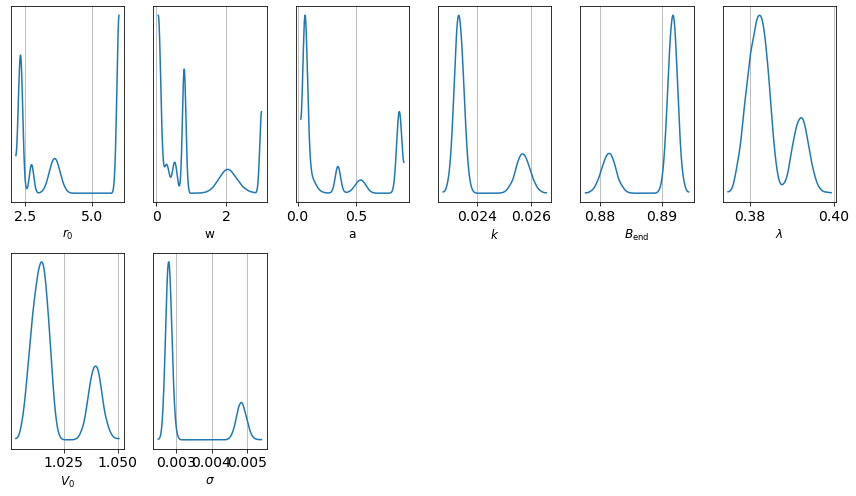

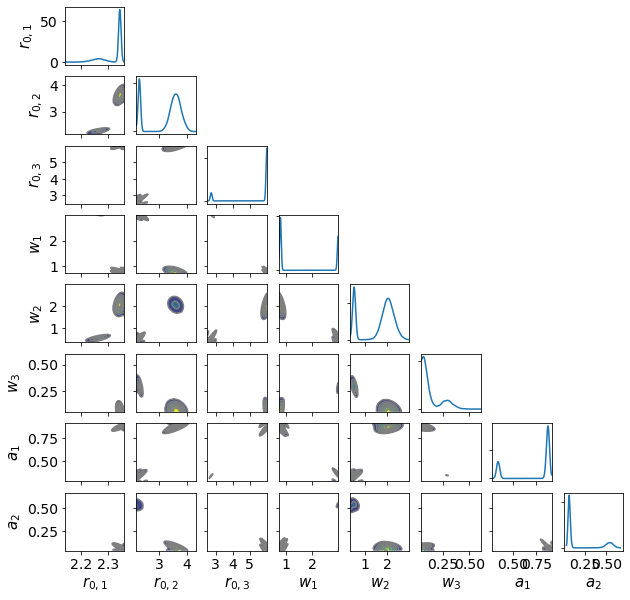

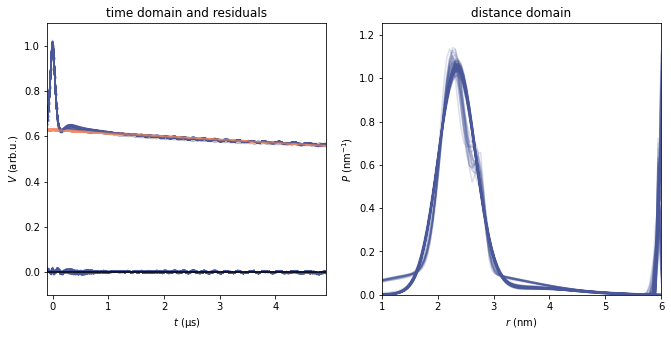

In [13]:
pm.save_trace(trace_s1_3G_rmax6_dr005_k_4c_5s_2t, 'trace_s1_3G_rmax6_dr005_4c_5s_2t.trace')

dive.summary(trace_s1_3G_rmax6_dr005_k_4c_5s_2t,s1_3Gmodel_rmax6_dr005)

### nGauss = 4

In [14]:
pars = {"method": 'gaussian', "r": np.linspace(1.5,8,130),"rmax_opt":"auto","bkgd_var":"k","nGauss":4}

s1_4Gmodel_rmaxauto_dr005 = dive.model(t1, V1, pars)

MCMCparameters = {"draws": 50000,"tune": 5000, "chains": 4, 'cores': 4}
trace_s1_4G_rmaxauto_dr005_k_4c_50s_5t = dive.sample(s1_4Gmodel_rmaxauto_dr005,MCMCparameters)

Time range:          627 points (dt=0.00798724) from -0.0968 µs to 4.9112 µs
Distance range:      132 points (dr=0.0503606) from 1.5 nm to 8.14759 nm
Model:              gaussian
Number of Gaussian: 4


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [lamb, V0, k, sigma, a, w, r0_rel]


Sampling 4 chains for 5_000 tune and 50_000 draw iterations (20_000 + 200_000 draws total) took 6585 seconds.
There were 214 divergences after tuning. Increase `target_accept` or reparameterize.
There were 268 divergences after tuning. Increase `target_accept` or reparameterize.
There were 1615 divergences after tuning. Increase `target_accept` or reparameterize.
There were 685 divergences after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
"$r_{0,1}$",2.129,0.021,2.093,2.169,0.004,0.003,23.0,70.0,1.10
"$r_{0,2}$",2.563,0.059,2.463,2.669,0.011,0.008,43.0,26.0,1.06
"$r_{0,3}$",3.648,0.636,2.529,4.323,0.303,0.231,7.0,26.0,1.53
"$r_{0,4}$",6.185,0.117,5.975,6.428,0.017,0.012,44.0,27.0,1.05
$w_1$,0.416,0.029,0.363,0.471,0.000,0.000,12250.0,31351.0,1.01
$w_2$,1.125,0.873,0.505,2.887,0.429,0.328,7.0,26.0,1.53
$w_3$,1.939,0.854,0.480,2.925,0.399,0.303,7.0,25.0,1.53
$w_4$,0.926,1.078,0.051,2.922,0.525,0.402,7.0,25.0,1.53
$a_1$,0.412,0.060,0.300,0.524,0.000,0.000,21065.0,41579.0,1.00
$a_2$,0.395,0.171,0.088,0.587,0.081,0.062,7.0,26.0,1.53


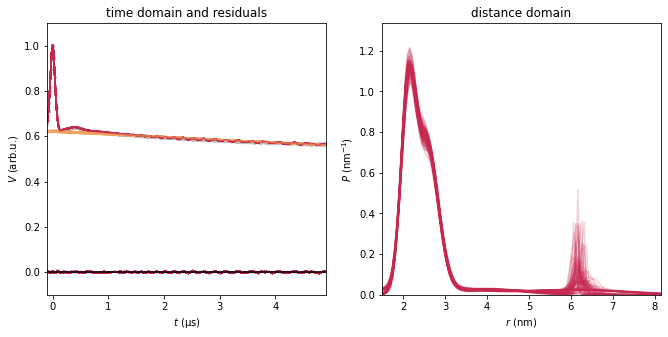

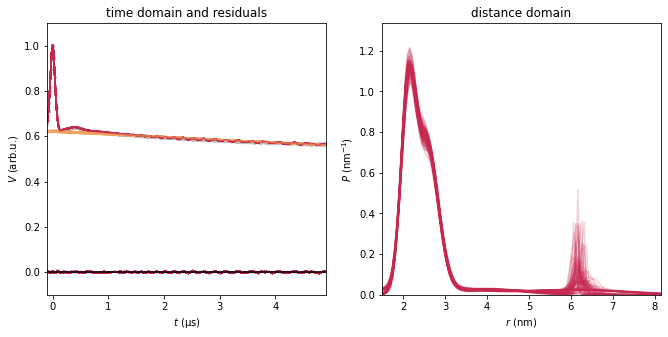

In [15]:
pm.save_trace(trace_s1_4G_rmaxauto_dr005_k_4c_50s_5t, 'trace_s1_4G_rmaxauto_dr005_k_4c_50s_5t.trace')

dive.printsummary(trace_s1_4G_rmaxauto_dr005_k_4c_50s_5t,s1_4Gmodel_rmaxauto_dr005)

dive.plotresult(trace_s1_4G_rmaxauto_dr005_k_4c_50s_5t,s1_4Gmodel_rmaxauto_dr005)

### For paper

In [3]:
pars = {"method": 'gaussian', "r": np.linspace(1.5,8,130),"rmax_opt":"auto","bkgd_var":"k","nGauss":4}

s1_4Gmodel_rmaxauto_dr005 = dive.model(t1, V1, pars)

trace_s1_4G = pm.load_trace('/Users/sarahsweger/Documents/GitHub/dive-scripts/manuscript/SRS_analysis/Results/Gaussian /Sample1/trace_s1_4G_rmaxauto_dr005_k_4c_50s_5t.trace',model=s1_4Gmodel_rmaxauto_dr005["model"])

Time range:          627 points (dt=0.00798724) from -0.0968 µs to 4.9112 µs
Distance range:      132 points (dr=0.0503606) from 1.5 nm to 8.14759 nm
Model:              gaussian
Number of Gaussian: 4


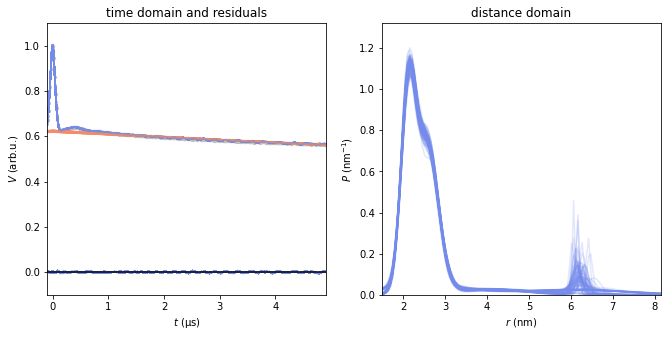

In [4]:
dive.plotresult(trace_s1_4G,s1_4Gmodel_rmaxauto_dr005,colors=['#758BEC','#F38D68'])
fig = plt.gcf()
fig.savefig("s1_4Gbayes_rmaxauto_color2.svg")

### Bayes factor 

# Sample 2 analysis

### nGauss = 1

In [16]:
pars = {"method": 'gaussian', "r": np.linspace(1.5,8,130),"rmax_opt":"auto","bkgd_var":"k","nGauss":1}

s2_1Gmodel_rmaxauto_dr005 = dive.model(t2, V2, pars)

MCMCparameters = {"draws": 50000,"tune": 5000, "chains": 4, 'cores': 4}
trace_s2_1G_rmaxauto_dr005_k_4c_50s_5t = dive.sample(s2_1Gmodel_rmaxauto_dr005,MCMCparameters)

Time range:          579 points (dt=0.00798618) from -0.104 µs to 4.52 µs
Distance range:      128 points (dr=0.050264) from 1.5 nm to 7.93379 nm
Model:              gaussian
Number of Gaussian: 1


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [lamb, V0, k, sigma, w, r0_rel]


/Users/sarahsweger/opt/anaconda3/envs/Python38/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/sarahsweger/opt/anaconda3/envs/Python38/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/sarahsweger/opt/anaconda3/envs/Python38/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/sarahsweger/opt/anaconda3/envs/Python38/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 5_000 tune and 50_000 draw iterations (20_000 + 200_000 draws total) took 1255 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
"$r_{0,1}$",3.692,0.004,3.685,3.699,0.0,0.0,142855.0,141655.0,1.0
$w_1$,1.007,0.012,0.985,1.028,0.0,0.0,146792.0,142837.0,1.0
$k$,0.038,0.000,0.038,0.039,0.0,0.0,147897.0,137134.0,1.0
$λ$,0.421,0.001,0.419,0.422,0.0,0.0,101578.0,116028.0,1.0
$V_0$,1.001,0.001,0.999,1.003,0.0,0.0,106804.0,121039.0,1.0
$σ$,0.005,0.000,0.005,0.005,0.0,0.0,152681.0,130964.0,1.0


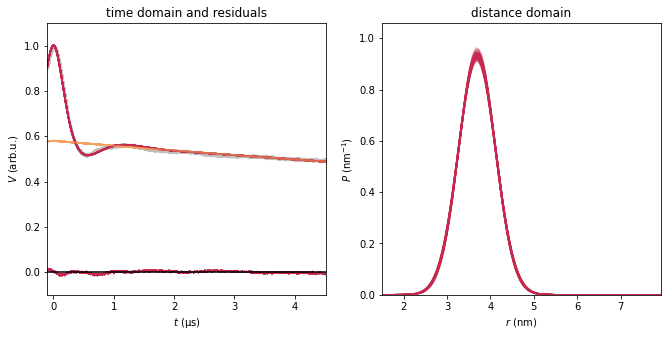

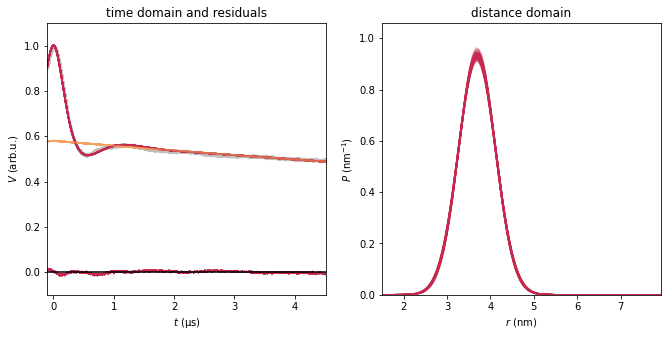

In [17]:
pm.save_trace(trace_s2_1G_rmaxauto_dr005_k_4c_50s_5t, 'trace_s2_1G_rmaxauto_dr005_k_4c_50s_5t.trace',overwrite=True)

dive.printsummary(trace_s2_1G_rmaxauto_dr005_k_4c_50s_5t,s2_1Gmodel_rmaxauto_dr005)
dive.plotresult(trace_s2_1G_rmaxauto_dr005_k_4c_50s_5t,s2_1Gmodel_rmaxauto_dr005)

### nGauss = 2

In [7]:
pars = {"method": 'gaussian', "r": np.linspace(1.5,8,130),"rmax_opt":"auto","bkgd_var":"k","nGauss":2}

s2_2Gmodel_rmaxauto_dr005 = dive.model(t2, V2, pars)

MCMCparameters = {"draws": 50000,"tune": 5000, "chains": 4, 'cores': 4}
trace_s2_2G_rmaxauto_dr005_k_4c_50s_5t = dive.sample(s2_2Gmodel_rmaxauto_dr005,MCMCparameters)

Time range:          579 points (dt=0.00798618) from -0.104 µs to 4.52 µs
Distance range:      128 points (dr=0.050264) from 1.5 nm to 7.93379 nm
Model:              gaussian
Number of Gaussian: 2


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [lamb, V0, k, sigma, a, w, r0_rel]


/Users/sarahsweger/opt/anaconda3/envs/Python38/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/sarahsweger/opt/anaconda3/envs/Python38/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/sarahsweger/opt/anaconda3/envs/Python38/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 3_000 tune and 30_000 draw iterations (12_000 + 120_000 draws total) took 2410 seconds.
There were 419 divergences after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
"$r_{0,1}$",3.672,0.004,3.666,3.679,0.000,0.000,22440.0,12229.0,1.0
"$r_{0,2}$",5.923,0.285,5.400,6.474,0.002,0.001,29616.0,31654.0,1.0
$w_1$,0.931,0.011,0.910,0.952,0.000,0.000,31677.0,28949.0,1.0
$w_2$,3.175,0.521,2.451,4.000,0.008,0.006,10918.0,5935.0,1.0
$a_1$,0.933,0.008,0.919,0.947,0.000,0.000,11467.0,5835.0,1.0
$a_2$,0.067,0.008,0.053,0.081,0.000,0.000,11467.0,5835.0,1.0
$k$,0.032,0.001,0.030,0.033,0.000,0.000,11815.0,6262.0,1.0
$λ$,0.432,0.002,0.428,0.437,0.000,0.000,11129.0,6287.0,1.0
$V_0$,1.002,0.002,0.999,1.005,0.000,0.000,20513.0,31188.0,1.0
$σ$,0.004,0.000,0.004,0.004,0.000,0.000,67287.0,36713.0,1.0


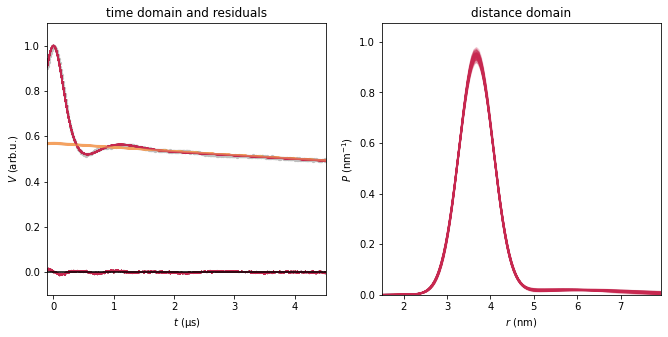

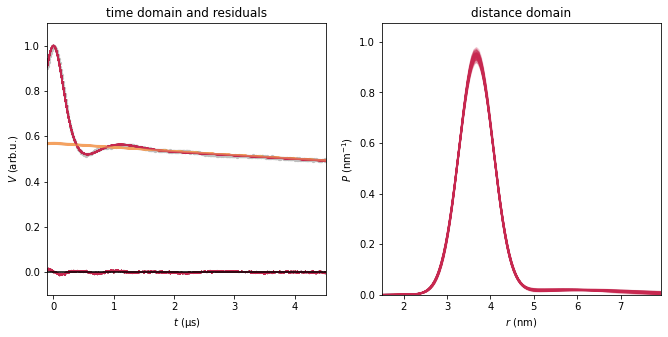

In [8]:
pm.save_trace(trace_s2_2G_rmaxauto_dr005_k_4c_30s_3t_oldMG, 'trace_s2_2G_rmaxauto_dr005_k_4c_50s_5t_oldMG.trace',overwrite=True)

dive.printsummary(trace_s2_2G_rmaxauto_dr005_k_4c_30s_3t_oldMG,s2_2Gmodel_rmaxauto_dr005_oldMG)
dive.plotresult(trace_s2_2G_rmaxauto_dr005_k_4c_30s_3t_oldMG,s2_2Gmodel_rmaxauto_dr005_oldMG)

In [4]:
pm.save_trace(trace_s2_2G_rmaxauto_dr005_k_4c_50s_5t, 'trace_s2_2G_rmaxauto_dr005_k_4c_50s_5t.trace',overwrite=True)

dive.printsummary(trace_s2_2G_rmaxauto_dr005_k_4c_50s_5t,s2_2Gmodel_rmaxauto_dr005)
dive.plotresult(trace_s2_2G_rmaxauto_dr005_k_4c_50s_5t,s2_2Gmodel_rmaxauto_dr005)

'trace_s2_3G_rmaxauto_dr005_k_4c_30s_5t_r0prior.trace'

### nGauss = 3

In [ ]:
pars = {"method": 'gaussian', "r": np.linspace(1.5,8,130),"rmax_opt":"auto","bkgd_var":"k","nGauss":3}

s2_3Gmodel_rmaxauto_dr005 = dive.model(t2, V2, pars)

MCMCparameters = {"draws": 50000,"tune": 5000, "chains": 4, 'cores': 4}
NUTSpars = {'target_accept':0.90}
trace_s2_3G_rmaxauto_dr005_k_4c_50s_5t = dive.sample(s2_3Gmodel_rmaxauto_dr005,MCMCparameters,NUTSpars=NUTSpars)

In [ ]:
pm.save_trace(trace_s2_3G_rmaxauto_dr005_k_4c_50s_5t, 'trace_s2_3G_rmaxauto_dr005_k_4c_50s_5t.trace',overwrite=True)

dive.printsummary(trace_s2_3G_rmaxauto_dr005_k_4c_50s_5t,s2_3Gmodel_rmaxauto_dr005)

### nGauss = 4

In [6]:
pars = {"method": 'gaussian', "r": np.linspace(1.5,6,90),"nGauss":4}

s2_4Gmodel_rmax6_dr005 = dive.model(t2, V2, pars)

MCMCparameters = {"draws": 50000,"tune": 20000, "chains": 4, 'cores': 4}
trace_s2_4G_rmax6_dr005_Bend_4c_50s_20t = dive.sample(s2_4Gmodel_rmax6_dr005,MCMCparameters)

Time range:          579 points (dt=0.00798618) from -0.104 µs to 4.52 µs
Distance range:       90 points (dr=0.05) from 1.5 nm to 6 nm
Model:              gaussian
Number of Gaussian: 4


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [lamb, V0, Bend, sigma, a, w, r0_rel]


/Users/sarahsweger/opt/anaconda3/envs/Python38/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/sarahsweger/opt/anaconda3/envs/Python38/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 20_000 tune and 50_000 draw iterations (80_000 + 200_000 draws total) took 7870 seconds.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
There were 589 divergences after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
"$r_{0,1}$",3.330,0.029,3.284,3.385,0.012,0.009,7.0,26.0,1.54
"$r_{0,2}$",3.771,0.022,3.735,3.816,0.008,0.006,8.0,25.0,1.46
"$r_{0,3}$",4.020,0.236,3.742,4.331,0.116,0.089,5.0,24.0,2.08
"$r_{0,4}$",4.983,0.980,3.801,5.988,0.489,0.375,5.0,24.0,2.10
$w_1$,0.376,0.032,0.315,0.436,0.009,0.006,13.0,36.0,1.21
$w_2$,1.691,1.253,0.385,3.000,0.626,0.480,6.0,78.0,1.74
$w_3$,0.631,0.182,0.361,0.945,0.085,0.066,5.0,25.0,2.13
$w_4$,0.270,0.229,0.050,0.746,0.108,0.082,7.0,25.0,1.62
$a_1$,0.296,0.051,0.207,0.378,0.021,0.015,7.0,34.0,1.53
$a_2$,0.286,0.162,0.099,0.525,0.078,0.059,6.0,31.0,1.86


/Users/sarahsweger/opt/anaconda3/envs/Python38/lib/python3.9/site-packages/arviz/plots/backends/matplotlib/pairplot.py:232: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of resulting pair plots with these variables, generating only a 8x8 grid
  warnings.warn(


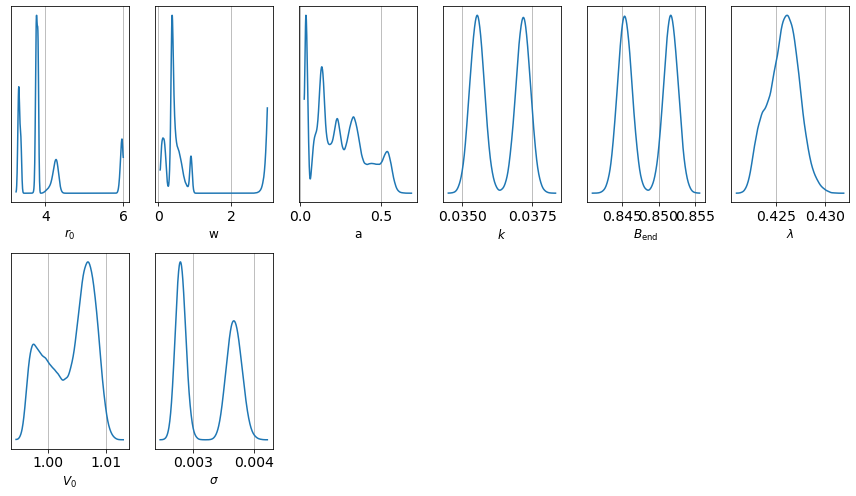

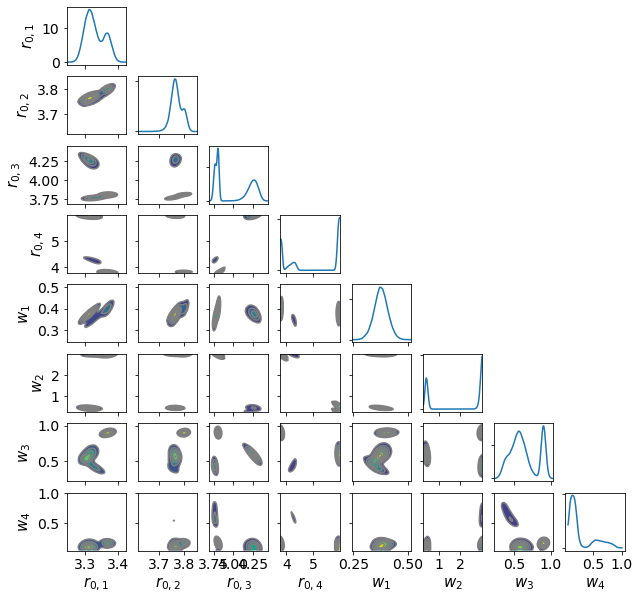

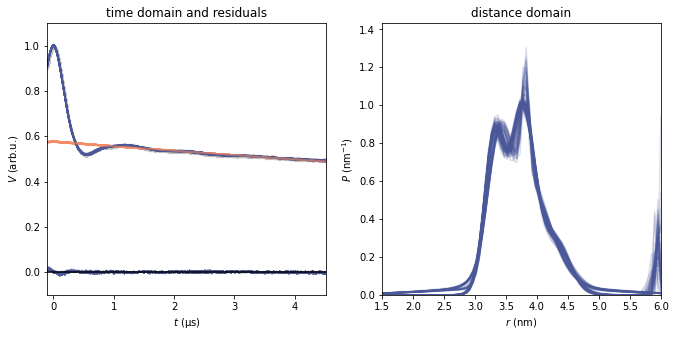

In [7]:
pm.save_trace(trace_s2_4G_rmax6_dr005_Bend_4c_50s_20t, 'trace_s2_4G_rmax6_dr005_Bend_4c_50s_20t_592div.trace',overwrite=True)

dive.summary(trace_s2_4G_rmax6_dr005_Bend_4c_50s_20t,s2_4Gmodel_rmax6_dr005)

### For paper

In [25]:
pars = {"method": 'gaussian', "r": np.linspace(1.5,8,130),"rmax_opt":"auto","bkgd_var":"k","nGauss":4}

s2_4Gmodel_rmaxauto_dr005 = dive.model(t2, V2, pars)

trace_s2_4G = pm.load_trace('/Users/sarahsweger/Documents/GitHub/dive-scripts/manuscript/SRS_analysis/Results/Gaussian /Sample2/trace_s2_4G_rmaxauto_dr005_k_4c_50s_5t.trace',model=s2_4Gmodel_rmaxauto_dr005["model"])

Time range:          579 points (dt=0.00798618) from -0.104 µs to 4.52 µs
Distance range:      128 points (dr=0.050264) from 1.5 nm to 7.93379 nm
Model:              gaussian
Number of Gaussian: 4


In [39]:
trace_s2_4G.varnames

['r0_rel_logodds__',
 'w_interval__',
 'a_stickbreaking__',
 'lamb_logodds__',
 'k_log__',
 'V0_lowerbound__',
 'sigma_log__',
 'r0',
 'w',
 'a',
 'P',
 'lamb',
 'k',
 'V0',
 'sigma']

In [37]:
trace_s2_4G.remove_values('r0_rel')

KeyError: 'r0_rel'

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
"$r_{0,1}$",3.309,0.016,3.279,3.340,0.000,0.000,8074.0,7050.0,1.0
"$r_{0,2}$",3.763,0.014,3.737,3.788,0.000,0.000,10319.0,16678.0,1.0
"$r_{0,3}$",4.250,0.077,4.100,4.382,0.001,0.001,8363.0,7732.0,1.0
"$r_{0,4}$",6.548,0.289,6.074,7.113,0.005,0.004,4221.0,2927.0,1.0
$w_1$,0.374,0.023,0.330,0.417,0.000,0.000,9398.0,10560.0,1.0
$w_2$,0.445,0.048,0.359,0.537,0.001,0.000,7814.0,7225.0,1.0
$w_3$,0.646,0.100,0.468,0.837,0.001,0.001,9460.0,13426.0,1.0
$w_4$,1.087,0.931,0.057,2.765,0.014,0.011,4948.0,3070.0,1.0
$a_1$,0.325,0.031,0.267,0.382,0.000,0.000,7445.0,6961.0,1.0
$a_2$,0.432,0.071,0.296,0.563,0.001,0.001,7971.0,7338.0,1.0


/Users/sarahsweger/opt/anaconda3/envs/Python38/lib/python3.9/site-packages/arviz/plots/backends/matplotlib/pairplot.py:232: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of resulting pair plots with these variables, generating only a 8x8 grid
  warnings.warn(


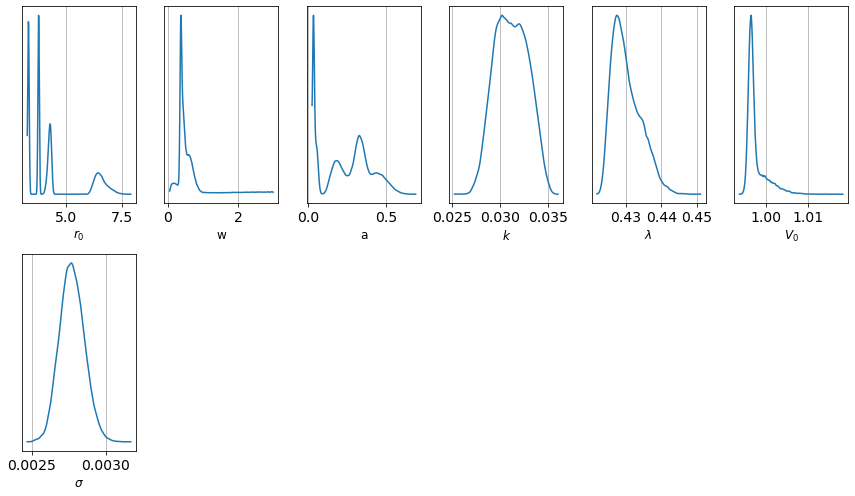

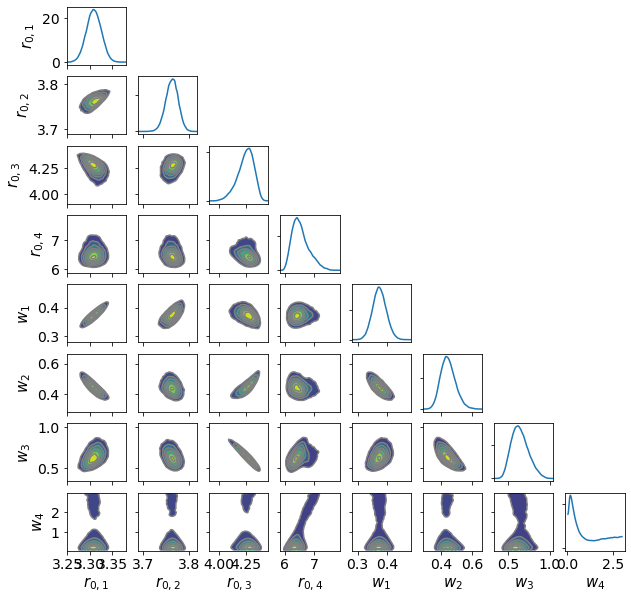

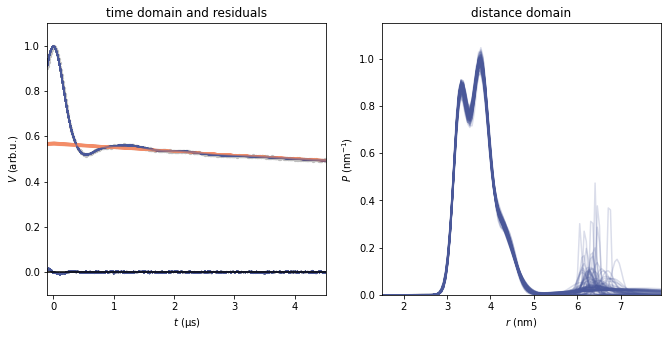

In [40]:
dive.summary(trace_s2_4G,s2_4Gmodel_rmaxauto_dr005)

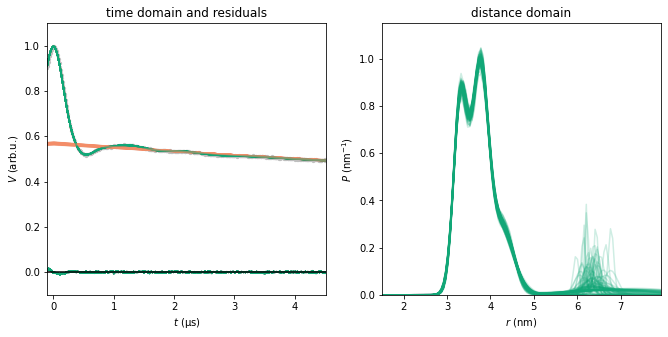

In [28]:
dive.plotresult(trace_s2_4G,s2_4Gmodel_rmaxauto_dr005,colors=['#11A777','#F38D68'])
fig = plt.gcf()
fig.savefig("s2_4Gbayes_rmaxauto.svg")

# Sample 3 analysis

### nGauss = 1

In [6]:
pars = {"method": 'gaussian', "r": np.linspace(1.5,8,130),"rmax_opt":"auto","bkgd_var":"k","nGauss":1}

s3_1Gmodel_rmaxauto_dr005 = dive.model(t3, V3, pars)

MCMCparameters = {"draws": 50000,"tune": 5000, "chains": 4, 'cores': 4}
trace_s3_1G_rmaxauto_dr005_k_4c_50s_5t = dive.sample(s3_1Gmodel_rmaxauto_dr005,MCMCparameters)

Time range:          539 points (dt=0.0159703) from -0.096 µs to 8.512 µs
Distance range:      165 points (dr=0.0500595) from 1.5 nm to 9.75982 nm
Model:              gaussian
Number of Gaussian: 1


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [lamb, V0, k, sigma, w, r0_rel]


/Users/sarahsweger/opt/anaconda3/envs/Python38/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/sarahsweger/opt/anaconda3/envs/Python38/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 5_000 tune and 50_000 draw iterations (20_000 + 200_000 draws total) took 1169 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
"$r_{0,1}$",5.075,0.008,5.060,5.090,0.0,0.0,111121.0,120640.0,1.0
$w_1$,1.349,0.028,1.296,1.403,0.0,0.0,107345.0,122245.0,1.0
$k$,0.030,0.000,0.030,0.031,0.0,0.0,111675.0,122330.0,1.0
$λ$,0.393,0.001,0.391,0.396,0.0,0.0,81313.0,100865.0,1.0
$V_0$,0.991,0.002,0.988,0.994,0.0,0.0,89029.0,107461.0,1.0
$σ$,0.008,0.000,0.007,0.008,0.0,0.0,113395.0,78811.0,1.0


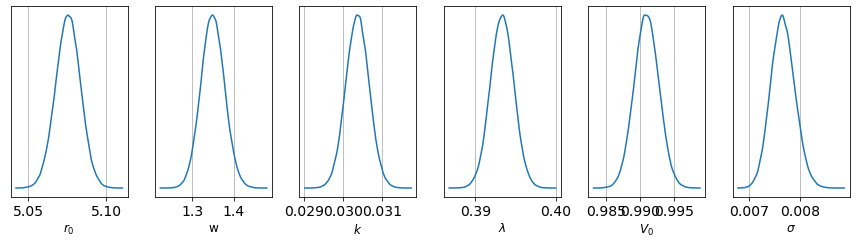

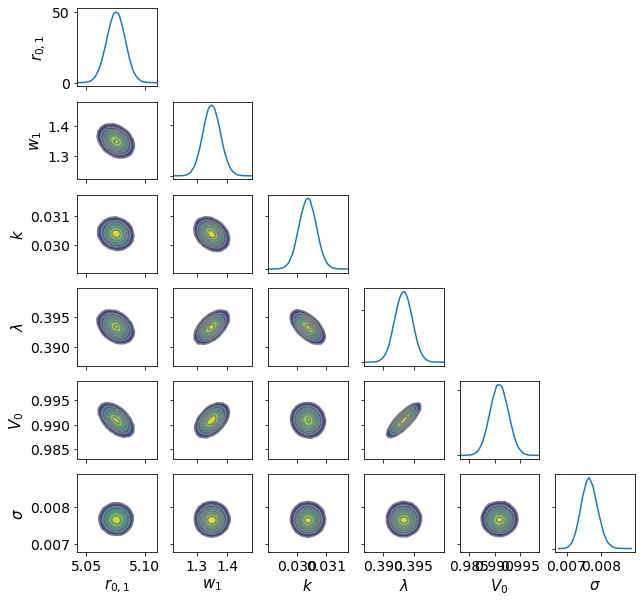

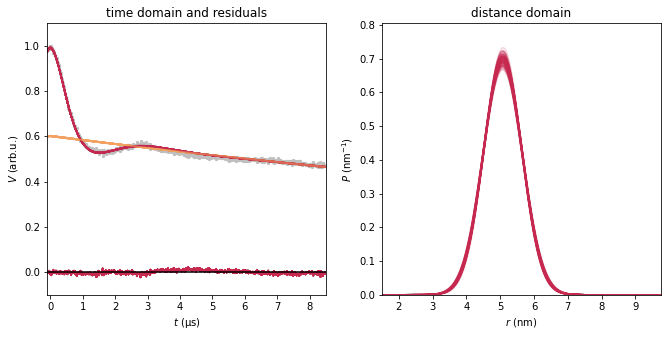

In [7]:
pm.save_trace(trace_s3_1G_rmaxauto_dr005_k_4c_50s_5t, 'trace_s3_1G_rmaxauto_dr005_k_4c_50s_5t.trace')

dive.summary(trace_s3_1G_rmaxauto_dr005_k_4c_50s_5t,s3_1Gmodel_rmaxauto_dr005)

### nGauss = 2

In [10]:
pars = {"method": 'gaussian', "r": np.linspace(1.5,8,130),"rmax_opt":"auto","bkgd_var":"k","nGauss":2}

s3_2Gmodel_rmaxauto_dr005 = dive.model(t3, V3, pars)

MCMCparameters = {"draws": 50000,"tune": 5000, "chains": 4, 'cores': 4}
trace_s3_2G_rmaxauto_dr005_k_4c_50s_5t = dive.sample(s3_2Gmodel_rmaxauto_dr005,MCMCparameters)

Time range:          539 points (dt=0.0159703) from -0.096 µs to 8.512 µs
Distance range:      165 points (dr=0.0500595) from 1.5 nm to 9.75982 nm
Model:              gaussian
Number of Gaussian: 2


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [lamb, V0, k, sigma, a, w, r0_rel]


/Users/sarahsweger/opt/anaconda3/envs/Python38/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/sarahsweger/opt/anaconda3/envs/Python38/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 5_000 tune and 50_000 draw iterations (20_000 + 200_000 draws total) took 2155 seconds.
There were 17982 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6099452387435083, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9381566060775544, but should be close to 0.8. Try to increase the number of tuning steps.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance pro

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
"$r_{0,1}$",5.039,0.006,5.027,5.051,0.000,0.000,1339.0,2092.0,1.0
"$r_{0,2}$",7.243,0.172,7.043,7.585,0.005,0.003,1428.0,3854.0,1.0
$w_1$,1.155,0.021,1.115,1.196,0.001,0.000,1616.0,3720.0,1.0
$w_2$,0.469,0.455,0.051,1.339,0.013,0.009,1190.0,2410.0,1.0
$a_1$,0.934,0.006,0.924,0.943,0.000,0.000,1442.0,2932.0,1.0
$a_2$,0.066,0.006,0.057,0.076,0.000,0.000,1442.0,2932.0,1.0
$k$,0.028,0.001,0.026,0.030,0.000,0.000,1390.0,3610.0,1.0
$λ$,0.399,0.003,0.395,0.405,0.000,0.000,1499.0,3454.0,1.0
$V_0$,0.988,0.001,0.986,0.991,0.000,0.000,1571.0,5372.0,1.0
$σ$,0.006,0.000,0.005,0.006,0.000,0.000,1180.0,2154.0,1.0


/Users/sarahsweger/opt/anaconda3/envs/Python38/lib/python3.9/site-packages/arviz/plots/backends/matplotlib/pairplot.py:232: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of resulting pair plots with these variables, generating only a 8x8 grid
  warnings.warn(


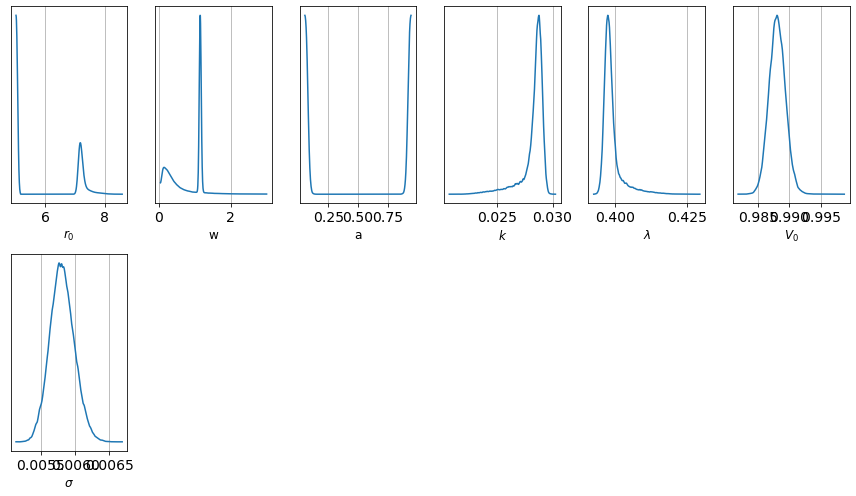

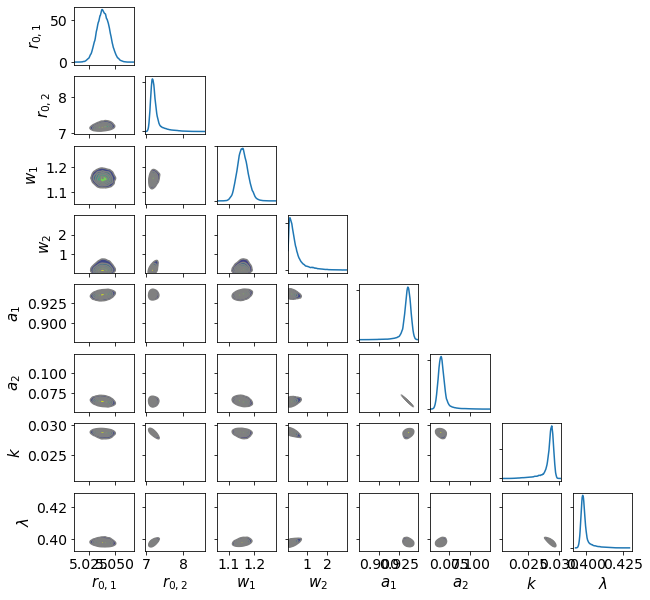

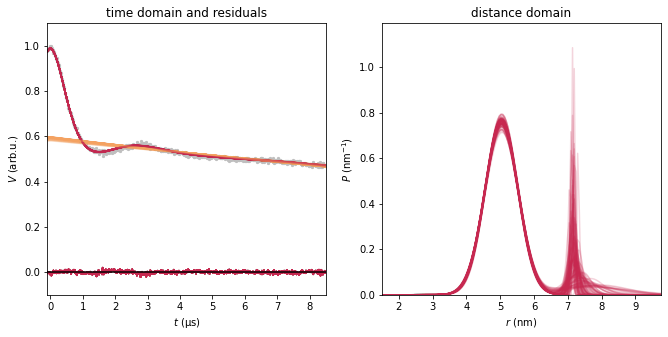

In [11]:
pm.save_trace(trace_s3_2G_rmaxauto_dr005_k_4c_50s_5t, 'trace_s3_2G_rmaxauto_dr005_k_4c_50s_5t.trace')

dive.summary(trace_s3_2G_rmaxauto_dr005_k_4c_50s_5t,s3_2Gmodel_rmaxauto_dr005)

### nGauss = 3

In [14]:
pars = {"method": 'gaussian', "r": np.linspace(1.5,8,130),"rmax_opt":"auto","bkgd_var":"k","nGauss":3}

s3_3Gmodel_rmaxauto_dr005 = dive.model(t3, V3, pars)

MCMCparameters = {"draws": 50000,"tune": 5000, "chains": 4, 'cores': 4}
trace_s3_3G_rmaxauto_dr005_k_4c_50s_5t = dive.sample(s3_3Gmodel_rmaxauto_dr005,MCMCparameters)

Time range:          539 points (dt=0.0159703) from -0.096 µs to 8.512 µs
Distance range:      165 points (dr=0.0500595) from 1.5 nm to 9.75982 nm
Model:              gaussian
Number of Gaussian: 3


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [lamb, V0, k, sigma, a, w, r0_rel]


/Users/sarahsweger/opt/anaconda3/envs/Python38/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/sarahsweger/opt/anaconda3/envs/Python38/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 5_000 tune and 50_000 draw iterations (20_000 + 200_000 draws total) took 3706 seconds.
There were 12921 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6635285209635076, but should be close to 0.8. Try to increase the number of tuning steps.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.9133674712454352, but should be close to 0.8. Try to increase the number of tuning steps.
There were 2 diverge

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
"$r_{0,1}$",4.544,0.517,3.997,5.074,0.258,0.198,6.0,79.0,1.73
"$r_{0,2}$",5.094,0.020,5.058,5.122,0.005,0.004,14.0,80.0,1.20
"$r_{0,3}$",7.999,0.819,7.072,9.073,0.401,0.306,6.0,77.0,1.73
$w_1$,0.637,0.342,0.178,1.042,0.167,0.129,6.0,79.0,1.73
$w_2$,1.773,0.799,0.952,2.899,0.388,0.296,6.0,78.0,1.73
$w_3$,0.460,0.421,0.051,1.205,0.036,0.025,122.0,2175.0,1.03
$a_1$,0.360,0.276,0.069,0.701,0.136,0.104,6.0,79.0,1.73
$a_2$,0.568,0.279,0.231,0.865,0.138,0.106,6.0,79.0,1.73
$a_3$,0.072,0.010,0.057,0.092,0.002,0.001,38.0,169.0,1.16
$k$,0.024,0.004,0.018,0.029,0.002,0.002,6.0,77.0,1.73


/Users/sarahsweger/opt/anaconda3/envs/Python38/lib/python3.9/site-packages/arviz/plots/backends/matplotlib/pairplot.py:232: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of resulting pair plots with these variables, generating only a 8x8 grid
  warnings.warn(


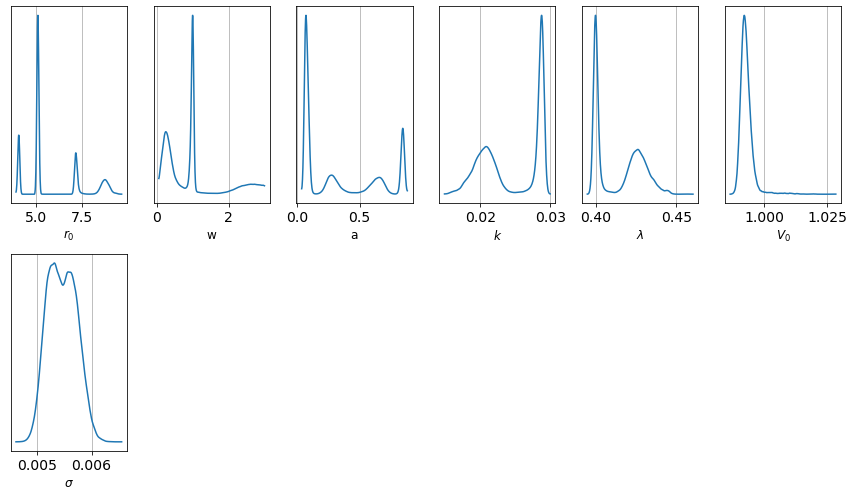

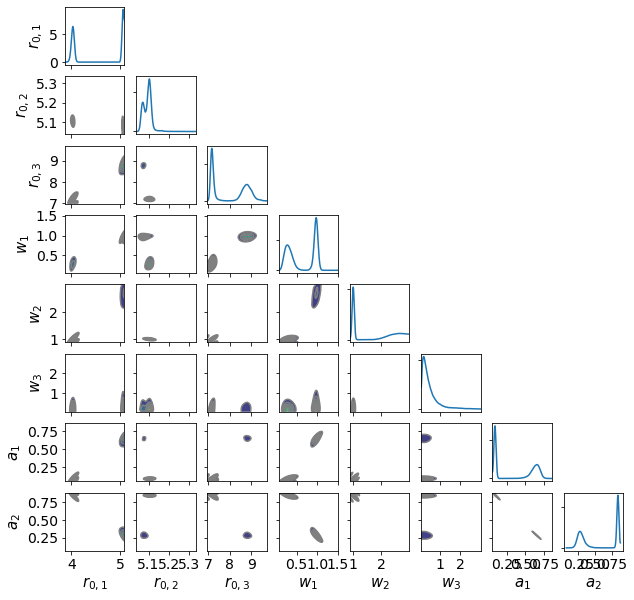

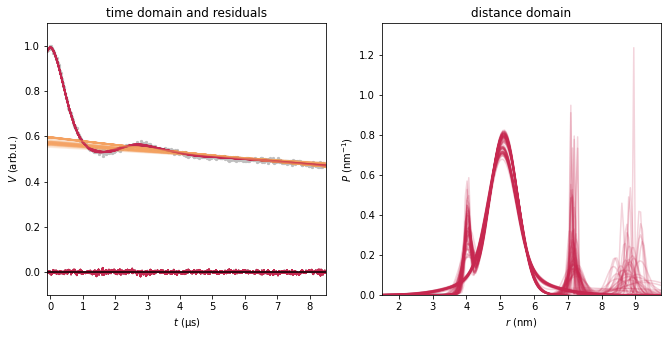

In [15]:
pm.save_trace(trace_s3_3G_rmaxauto_dr005_k_4c_50s_5t, 'trace_s3_3G_rmaxauto_dr005_k_4c_50s_5t.trace')

dive.summary(trace_s3_3G_rmaxauto_dr005_k_4c_50s_5t,s3_3Gmodel_rmaxauto_dr005)

### nGauss = 4

In [ ]:
pars = {"method": 'gaussian', "r": np.linspace(1.5,8,130),"rmax_opt":"auto","bkgd_var":"k","nGauss":4}

s3_4Gmodel_rmaxauto_dr005 = dive.model(t3, V3, pars)

MCMCparameters = {"draws": 50000,"tune": 5000, "chains": 4, 'cores': 4}
trace_s3_4G_rmaxauto_dr005_k_4c_50s_5t = dive.sample(s3_4Gmodel_rmaxauto_dr005,MCMCparameters)

In [ ]:
pm.save_trace(trace_s3_4G_rmaxauto_dr005_k_4c_50s_5t, 'trace_s3_4G_rmaxauto_dr005_k_4c_50s_5t.trace')

dive.summary(trace_s3_4G_rmaxauto_dr005_k_4c_50s_5t,s3_4Gmodel_rmaxauto_dr005)

### For paper

In [55]:
pars = {"method": 'gaussian', "r": np.linspace(1.5,9,150),"rmax_opt":"auto","bkgd_var":"k",'nGauss':4}

s3_4Gmodel_rmaxauto_dr005 = dive.model(t3, V3, pars)

trace_s3_4G = pm.load_trace('/Users/sarahsweger/Downloads/trace_s3_4G_rmaxauto_dr005_k_4c_50s_5t.trace',model=s3_4Gmodel_rmaxauto_dr005['model'])

Time range:          539 points (dt=0.0159703) from -0.096 µs to 8.512 µs
Distance range:      165 points (dr=0.0500595) from 1.5 nm to 9.75982 nm
Model:              gaussian
Number of Gaussian: 4


In [56]:
trace_s3_4G.remove_values('r0_rel')

KeyError: 'r0_rel'

In [57]:
dive.printsummary(trace_s3_4G,s3_4Gmodel_rmaxauto_dr005)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
"$r_{0,1}$",4.019,0.422,3.513,4.948,0.119,0.098,7.0,11.0,1.59
"$r_{0,2}$",4.775,0.374,4.032,5.116,0.125,0.092,7.0,29.0,1.54
"$r_{0,3}$",5.426,0.580,5.084,7.070,0.217,0.160,6.0,28.0,1.85
"$r_{0,4}$",7.313,0.367,6.991,7.905,0.072,0.052,42.0,29.0,1.08
$w_1$,0.593,0.504,0.081,1.550,0.147,0.107,12.0,209.0,1.29
$w_2$,0.750,0.505,0.077,1.610,0.114,0.081,26.0,133.0,1.21
$w_3$,0.820,0.339,0.127,1.101,0.099,0.072,9.0,26.0,1.49
$w_4$,0.606,0.543,0.050,1.629,0.129,0.093,19.0,31.0,1.14
$a_1$,0.123,0.109,0.000,0.308,0.046,0.035,6.0,11.0,1.73
$a_2$,0.299,0.313,0.021,0.850,0.145,0.113,7.0,26.0,1.65


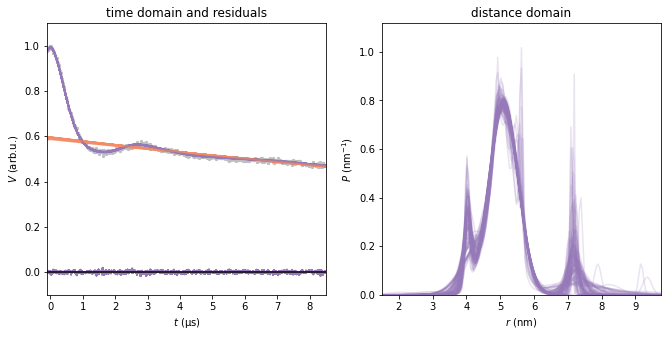

In [59]:
dive.plotresult(trace_s3_4G,s3_4Gmodel_rmaxauto_dr005,colors=['#9679B9','#F38D68'])
fig = plt.gcf()
fig.savefig("s3_4Gbayes_rmaxauto.svg")

# Sample 4 analysis

### nGauss = 1

In [8]:
pars = {"method": 'gaussian', "r": np.linspace(1.5,8,130),"rmax_opt":"auto","bkgd_var":"k","nGauss":1}

s4_1Gmodel_rmaxauto_dr005 = dive.model(t4, V4, pars)

MCMCparameters = {"draws": 50000,"tune": 5000, "chains": 4, 'cores': 4}
trace_s4_1G_rmaxauto_dr005_k_4c_50s_5t = dive.sample(s4_1Gmodel_rmaxauto_dr005,MCMCparameters)

Time range:          829 points (dt=0.00799035) from -0.104 µs to 6.52 µs
Distance range:      148 points (dr=0.0502949) from 1.5 nm to 8.94365 nm
Model:              gaussian
Number of Gaussian: 1


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [lamb, V0, k, sigma, w, r0_rel]


/Users/sarahsweger/opt/anaconda3/envs/Python38/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/sarahsweger/opt/anaconda3/envs/Python38/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/sarahsweger/opt/anaconda3/envs/Python38/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 5_000 tune and 50_000 draw iterations (20_000 + 200_000 draws total) took 1403 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
"$r_{0,1}$",4.735,0.027,4.684,4.786,0.0,0.0,105418.0,118029.0,1.0
$w_1$,2.997,0.003,2.992,3.000,0.0,0.0,126723.0,75443.0,1.0
$k$,0.036,0.001,0.035,0.037,0.0,0.0,116657.0,122291.0,1.0
$λ$,0.342,0.002,0.338,0.346,0.0,0.0,107824.0,111867.0,1.0
$V_0$,0.963,0.003,0.957,0.968,0.0,0.0,95697.0,106743.0,1.0
$σ$,0.012,0.000,0.011,0.012,0.0,0.0,141589.0,100727.0,1.0


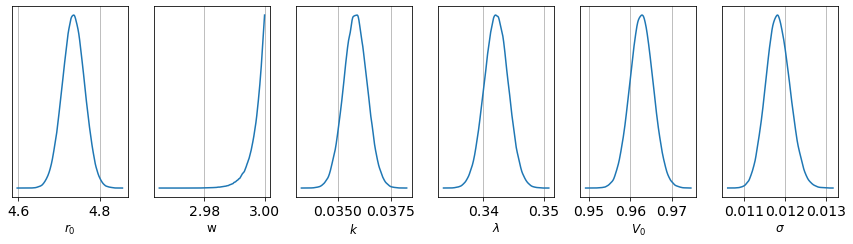

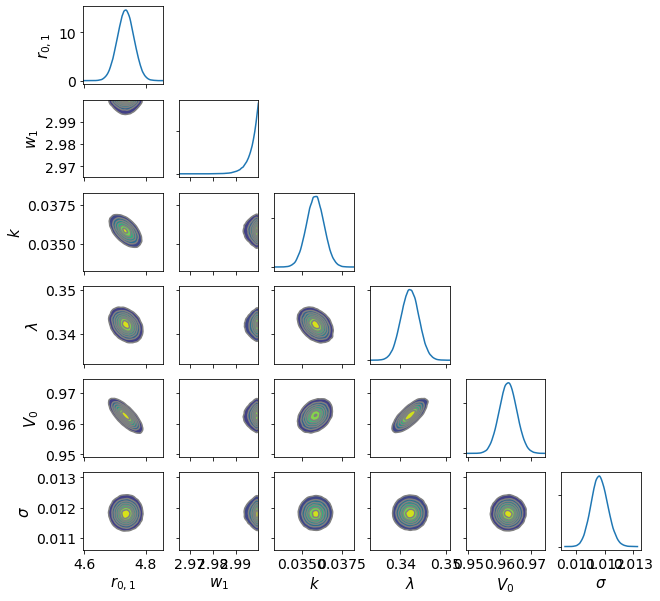

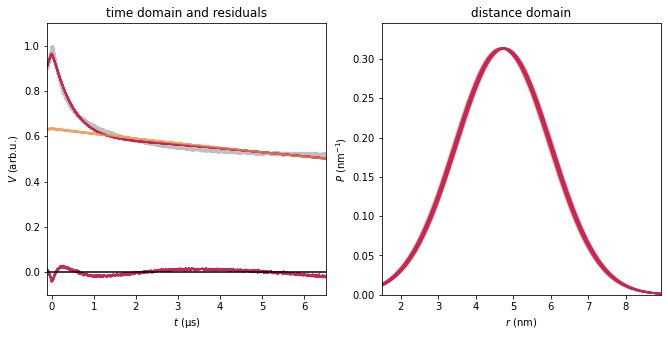

In [9]:
pm.save_trace(trace_s4_1G_rmaxauto_dr005_k_4c_50s_5t, 'trace_s4_1G_rmaxauto_dr005_k_4c_50s_5t.trace')

dive.summary(trace_s4_1G_rmaxauto_dr005_k_4c_50s_5t,s4_1Gmodel_rmaxauto_dr005)

### nGauss = 2

In [12]:
pars = {"method": 'gaussian', "r": np.linspace(1.5,8,130),"rmax_opt":"auto","bkgd_var":"k","nGauss":2}

s4_2Gmodel_rmaxauto_dr005 = dive.model(t4, V4, pars)

MCMCparameters = {"draws": 50000,"tune": 5000, "chains": 4, 'cores': 4}
trace_s4_2G_rmaxauto_dr005_k_4c_50s_5t = dive.sample(s4_2Gmodel_rmaxauto_dr005,MCMCparameters)

Time range:          829 points (dt=0.00799035) from -0.104 µs to 6.52 µs
Distance range:      148 points (dr=0.0502949) from 1.5 nm to 8.94365 nm
Model:              gaussian
Number of Gaussian: 2


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [lamb, V0, k, sigma, a, w, r0_rel]


/Users/sarahsweger/opt/anaconda3/envs/Python38/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/sarahsweger/opt/anaconda3/envs/Python38/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/sarahsweger/opt/anaconda3/envs/Python38/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/sarahsweger/opt/anaconda3/envs/Python38/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 5_000 tune and 50_000 draw iterations (20_000 + 200_000 draws total) took 7066 seconds.
There were 132 divergences after tuning. Increase `target_accept` or reparameterize.
There wer

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
"$r_{0,1}$",3.826,0.017,3.794,3.857,0.000,0.000,4472.0,1714.0,1.0
"$r_{0,2}$",7.316,0.058,7.210,7.427,0.000,0.000,15430.0,3965.0,1.0
$w_1$,2.836,0.055,2.732,2.939,0.001,0.001,5323.0,1821.0,1.0
$w_2$,2.906,0.084,2.748,3.000,0.002,0.001,4411.0,1382.0,1.0
$a_1$,0.677,0.009,0.662,0.694,0.000,0.000,4123.0,1445.0,1.0
$a_2$,0.323,0.009,0.306,0.338,0.000,0.000,4123.0,1445.0,1.0
$k$,0.015,0.001,0.014,0.016,0.000,0.000,22861.0,13647.0,1.0
$λ$,0.431,0.002,0.426,0.436,0.000,0.000,17867.0,12257.0,1.0
$V_0$,1.020,0.002,1.015,1.024,0.000,0.000,17909.0,13229.0,1.0
$σ$,0.002,0.000,0.002,0.003,0.000,0.000,22140.0,10184.0,1.0


/Users/sarahsweger/opt/anaconda3/envs/Python38/lib/python3.9/site-packages/arviz/plots/backends/matplotlib/pairplot.py:232: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of resulting pair plots with these variables, generating only a 8x8 grid
  warnings.warn(


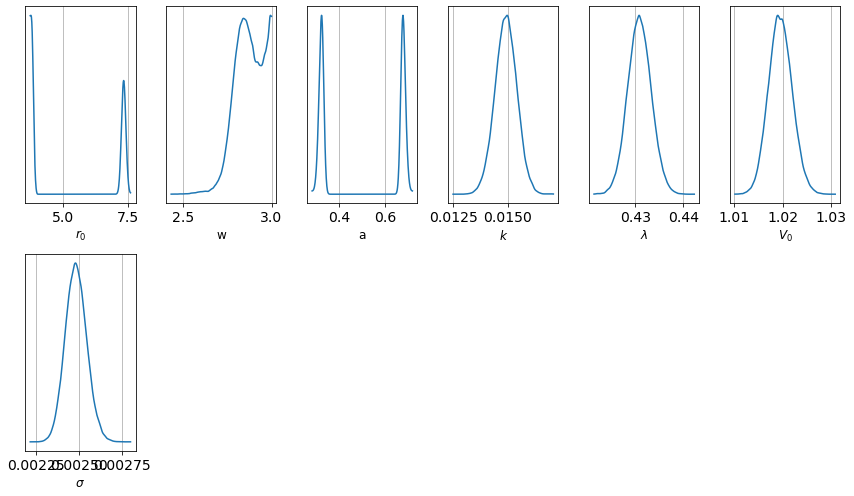

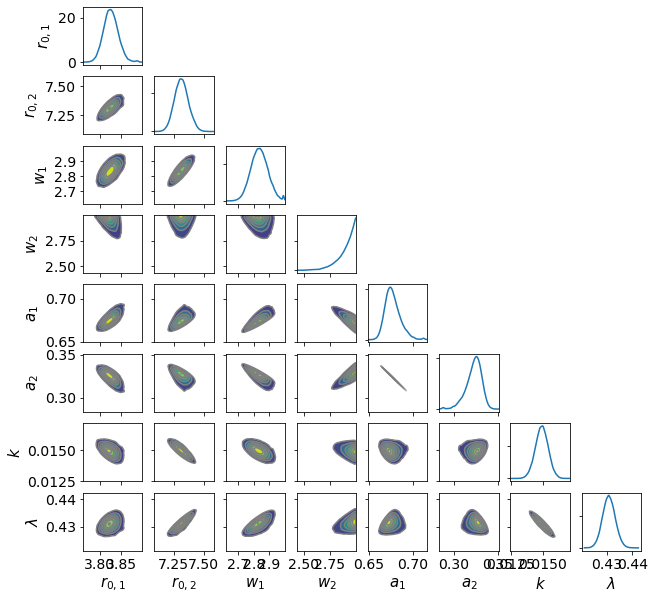

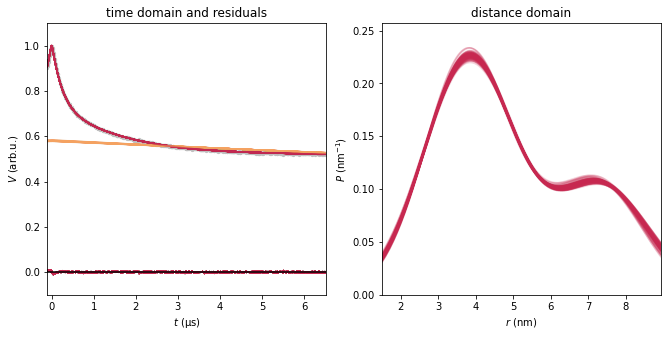

In [13]:
pm.save_trace(trace_s4_2G_rmaxauto_dr005_k_4c_50s_5t, 'trace_s4_2G_rmaxauto_dr005_k_4c_50s_5t.trace')

dive.summary(trace_s4_2G_rmaxauto_dr005_k_4c_50s_5t,s4_2Gmodel_rmaxauto_dr005)

### For paper 

In [6]:
pars = {"method": 'gaussian', "r": np.linspace(1.5,8,130),"rmax_opt":"auto","bkgd_var":"k","nGauss":2}

s4_2Gmodel_rmaxauto_dr005 = dive.model(t4, V4, pars)

trace_s4_2G = pm.load_trace('/Users/sarahsweger/Documents/GitHub/dive-scripts/manuscript/SRS_analysis/Results/Gaussian /Sample4/trace_s4_2G_rmaxauto_dr005_k_4c_50s_5t.trace',model=s4_2Gmodel_rmaxauto_dr005["model"])

Time range:          829 points (dt=0.00799035) from -0.104 µs to 6.52 µs
Distance range:      148 points (dr=0.0502949) from 1.5 nm to 8.94365 nm
Model:              gaussian
Number of Gaussian: 2


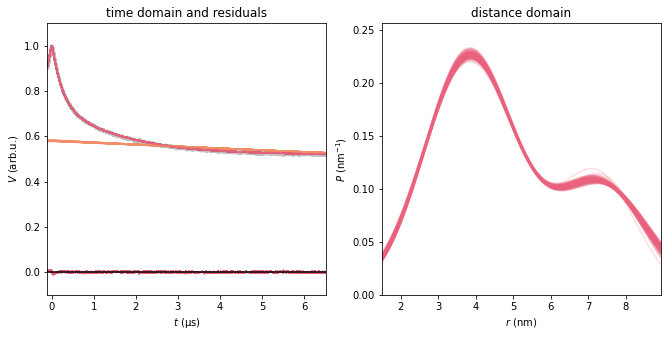

In [7]:
dive.plotresult(trace_s4_2G,s4_2Gmodel_rmaxauto_dr005,colors=['#E9617C','#F38D68'])
fig = plt.gcf()
fig.savefig("s4_2Gbayes_rmaxauto_color2.svg")

### nGauss = 3

In [ ]:
pars = {"method": 'gaussian', "r": np.linspace(1.5,8,130),"rmax_opt":"auto","bkgd_var":"k","nGauss":3}

s4_3Gmodel_rmaxauto_dr005 = dive.model(t4, V4, pars)

MCMCparameters = {"draws": 50000,"tune": 5000, "chains": 4, 'cores': 4}
NUTSpars = {'target_accept':0.90}
trace_s4_3G_rmaxauto_dr005_k_4c_50s_5t = dive.sample(s4_3Gmodel_rmaxauto_dr005,MCMCparameters,NUTSpars=NUTSpars)

In [ ]:
pm.save_trace(trace_s4_3G_rmaxauto_dr005_k_4c_50s_5t, 'trace_s4_3G_rmaxauto_dr005_k_4c_50s_5t.trace')

dive.printsummary(trace_s4_3G_rmaxauto_dr005_k_4c_50s_5t,s4_3Gmodel_rmaxauto_dr005)

### nGauss = 4

In [ ]:
pars = {"method": 'gaussian', "r": np.linspace(1.5,8,130),"rmax_opt":"auto","bkgd_var":"k","nGauss":4}

s4_4Gmodel_rmaxauto_dr005 = dive.model(t4, V4, pars)

MCMCparameters = {"draws": 50000,"tune": 5000, "chains": 4, 'cores': 4}
NUTSpars = {'target_accept':0.90}
trace_s4_4G_rmaxauto_dr005_k_4c_50s_5t = dive.sample(s4_4Gmodel_rmaxauto_dr005,MCMCparameters,NUTSpars=NUTSpars)

In [ ]:
pm.save_trace(trace_s4_4G_rmaxauto_dr005_k_4c_50s_5t, 'trace_s4_4G_rmaxauto_dr005_k_4c_50s_5t.trace')

dive.printsummary(trace_s4_4G_rmaxauto_dr005_k_4c_50s_5t,s4_4Gmodel_rmaxauto_dr005)